# **Data Augmentation To Address Overfitting In Flower Classification CNN**

---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import tensorflow as tf

dataset_url = "http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)


228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

#to get all the roses images we need to use the syntax

In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15965652160_de91389965_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14107161906_5737e0e4ec.jpg'),
 PosixPath('datasets/flower_photos/roses/15761264350_4caaf080f6_m.jpg')]

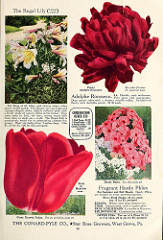

In [ ]:
PIL.Image.open(str(roses[7]))

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/5644061265_e02135f028_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/3253320570_b617f7fd4b.jpg'),
 PosixPath('datasets/flower_photos/tulips/8562853756_73778dac25_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2431737309_1468526f8b.jpg'),
 PosixPath('datasets/flower_photos/tulips/12024561754_ce9667e4dc_n.jpg')]

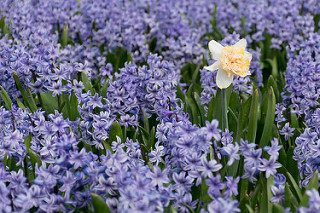

In [ ]:
PIL.Image.open(tulips[9])

In [ ]:
flowers_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tuplis' : list(data_dir.glob('tuplis/*'))

}

In [ ]:
flowers_label_dict = {
    'roses' :0,
    'daisy' :1,
    'dandelion' :2,
    'sunflowers' :3,
    'tuplis' :4,

}

#cv module is mainly used to convert the images into the list of numpy array

In [ ]:
str(flowers_dict['roses'][0])

'datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_dict['roses'][0])) # it is used to convert into 3D array

In [ ]:
img.shape

(238, 320, 3)

# as the images are random sizes we can make the dimenssions as ssame

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y = [],[]
for flower_names , images in flowers_dict.items():
  # here .item is mainly used in tensorflow numpy when we want to get the value of the item
  for image in images:
    img = cv2.imread(str(image))
    resize_img = cv2.resize(img,(180,180))
    x.append(resize_img)
    y.append(flowers_label_dict[flower_names])


array([[[ 11,  14,  14],
        [  7,  12,  11],
        [  6,  11,  10],
        ...,
        [ 30,  55,  45],
        [ 28,  50,  42],
        [ 26,  47,  39]],

       [[ 12,  17,  17],
        [  9,  15,  14],
        [  7,  12,  11],
        ...,
        [ 32,  58,  48],
        [ 29,  53,  45],
        [ 29,  51,  43]],

       [[ 12,  18,  17],
        [ 11,  17,  16],
        [  8,  13,  12],
        ...,
        [ 31,  59,  50],
        [ 29,  55,  47],
        [ 28,  54,  47]],

       ...,

       [[  1,   8,   1],
        [  0,   7,   0],
        [  1,   8,   1],
        ...,
        [ 44,  69,  70],
        [ 48,  72,  73],
        [ 57,  77,  78]],

       [[  0,   7,   0],
        [  0,   7,   0],
        [  0,   7,   0],
        ...,
        [ 47,  70,  70],
        [ 58,  79,  80],
        [ 75,  95,  96]],

       [[  0,   7,   0],
        [  1,   8,   1],
        [  0,   7,   0],
        ...,
        [ 76,  96,  97],
        [ 91, 111, 112],
        [100, 119, 121]]], dtype=uint8)
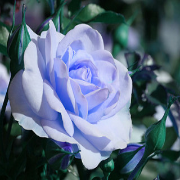

In [ ]:
x[0]

In [ ]:
X = np.array(x)
Y= np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  =  train_test_split(X,Y,random_state=0)

In [ ]:
len(x_train)

2153

# lests perform the scaling  by divide the numpy values with the 255 thats because we are having totally 255 pixel

In [ ]:
x_train_scale =x_train/255
x_test_scale = x_test/255

In [ ]:
x_train_scale[0]

array([[[0.37254902, 0.21176471, 0.75686275],
        [0.36862745, 0.22352941, 0.76078431],
        [0.1254902 , 0.01568627, 0.49803922],
        ...,
        [0.72941176, 0.54901961, 1.        ],
        [0.69803922, 0.52156863, 0.99607843],
        [0.63137255, 0.50588235, 0.98823529]],

       [[0.32941176, 0.19215686, 0.74901961],
        [0.3254902 , 0.20784314, 0.74117647],
        [0.18823529, 0.09019608, 0.62745098],
        ...,
        [0.68627451, 0.46666667, 0.99215686],
        [0.64705882, 0.43137255, 0.95686275],
        [0.65098039, 0.48235294, 0.98039216]],

       [[0.34117647, 0.18823529, 0.7372549 ],
        [0.34509804, 0.2       , 0.76470588],
        [0.27843137, 0.14901961, 0.70196078],
        ...,
        [0.63137255, 0.38823529, 0.98431373],
        [0.64705882, 0.39607843, 0.97254902],
        [0.67843137, 0.47058824, 0.98431373]],

       ...,

       [[0.21960784, 0.0745098 , 0.62352941],
        [0.2627451 , 0.08627451, 0.67843137],
        [0.31764706, 0

#lets build the model now . here we use the convolution neural networks

In [ ]:

num_classes =5 # totally we are having the 5 different types of flowers


model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),


    # lets have the dense network
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)


])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =['accuracy'])
model.fit(x_train_scale,y_train,epochs=30)

# here 16 means we are having the 16 filters each of the size is 3,3

Epoch 1/30
68/68 [==============================] - 7s 30ms/step - loss: 1.1624 - accuracy: 0.4965
Epoch 2/30
68/68 [==============================] - 1s 19ms/step - loss: 0.7888 - accuracy: 0.6902
Epoch 3/30
68/68 [==============================] - 1s 19ms/step - loss: 0.6278 - accuracy: 0.7743
Epoch 4/30
68/68 [==============================] - 1s 19ms/step - loss: 0.4609 - accuracy: 0.8328
Epoch 5/30
68/68 [==============================] - 1s 20ms/step - loss: 0.2996 - accuracy: 0.9001
Epoch 6/30
68/68 [==============================] - 2s 23ms/step - loss: 0.1893 - accuracy: 0.9368
Epoch 7/30
68/68 [==============================] - 1s 20ms/step - loss: 0.1134 - accuracy: 0.9610
Epoch 8/30
68/68 [==============================] - 1s 20ms/step - loss: 0.0628 - accuracy: 0.9819
Epoch 9/30
68/68 [==============================] - 1s 20ms/step - loss: 0.0852 - accuracy: 0.9726
Epoch 10/30
68/68 [==============================] - 1s 19ms/step - loss: 0.0636 - accuracy: 0.9833
Epoch 11/

In [ ]:
model.evaluate(x_test_scale,y_test)

23/23 [==============================] - 1s 26ms/step - loss: 2.6934 - accuracy: 0.6852


[2.6934449672698975, 0.6852367520332336]

# here our trainig data is having the best accuracy but our testing one is having the less accuracy hence we can say that our model has been over fitted .

In [ ]:
predictions =  model.predict(x_test_scale)
predictions

23/23 [==============================] - 0s 8ms/step


array([[  7.7350006 ,   8.196212  ,   0.16718063,   7.967702  ,
        -34.76317   ],
       [  9.857739  ,  -3.3072991 ,  14.680502  ,   8.7015505 ,
        -41.645798  ],
       [ 11.750629  ,   8.564107  ,  -7.755524  ,   5.2685566 ,
        -29.481197  ],
       ...,
       [  1.0668832 ,  -0.80750877,  18.41091   ,  -0.72576153,
        -26.894499  ],
       [  3.1154532 ,  13.399585  ,   6.5557294 ,  -6.7605166 ,
        -25.224396  ],
       [ 26.40573   ,   7.9392543 ,   6.747343  , -22.160734  ,
        -47.6732    ]], dtype=float32)

#softmax function in the tensorflow mainly used to convert the linear values in the terms of probability  values

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.5984049e-01, 4.1210538e-01, 1.3429027e-04, 3.2791987e-01,
       9.0779156e-20], dtype=float32)>

In [ ]:
np.argmax(score)

1

#**TO SOLVE THE OVERFITTING IN THE CONVOLUTION WE USE THE DATA ARGUMENTATION MENTHOD**

#here the tensorflow has a gud API w are gng to use that API

In [ ]:
data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5),
])

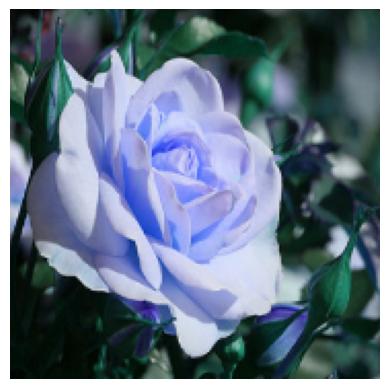

In [ ]:
plt.axis('off')
plt.imshow(x[0])

In [ ]:
data_argumentation(x)[0] # this is the dimenssionsl pt

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[119.10932  , 131.22394  , 182.89069  ],
        [115.04078  , 127.48677  , 180.09578  ],
        [108.992294 , 121.216896 , 175.32886  ],
        ...,
        [ 83.51715  , 110.85699  , 123.847984 ],
        [102.088776 , 124.00401  , 146.87132  ],
        [118.09365  , 131.77075  , 159.54681  ]],

       [[121.01111  , 132.12111  , 181.44852  ],
        [116.73306  , 128.75945  , 179.67616  ],
        [109.93564  , 123.43663  , 175.43465  ],
        ...,
        [ 82.724335 , 109.7887   , 124.37808  ],
        [107.032845 , 127.89561  , 150.87036  ],
        [127.679214 , 138.64185  , 167.19585  ]],

       [[125.02136  , 133.22787  , 181.2259   ],
        [121.776924 , 130.6048   , 178.77892  ],
        [114.02581  , 125.56954  , 176.56953  ],
        ...,
        [ 83.50172  , 108.62468  , 124.37875  ],
        [109.599365 , 126.28804  , 152.16666  ],
        [129.83716  , 140.4003   , 169.51227  ]],

       ...,

     

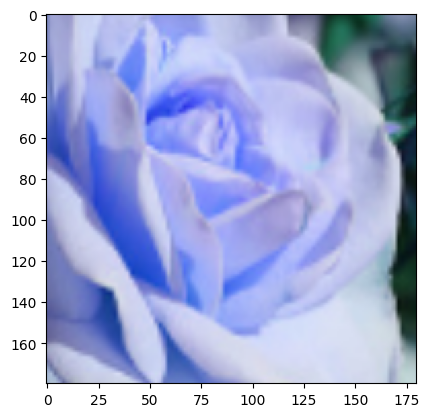

In [ ]:
plt.imshow(data_argumentation(x)[0].numpy().astype('uint8'))


# here we performed the zooming  , like wise we are also having randomcontrast, randomrotate , ..etc

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:

num_classes =5 # totally we are having the 5 different types of flowers


model = Sequential([

    data_augmentation,

    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # it dropout 20 neurons at random ineach pass


    # lets have the dense network
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)


])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =['accuracy'])
model.fit(x_train_scale,y_train,epochs=30)

# here 16 means we are having the 16 filters each of the size is 3,3

Epoch 1/30
68/68 [==============================] - 5s 31ms/step - loss: 1.1172 - accuracy: 0.5248
Epoch 2/30
68/68 [==============================] - 2s 32ms/step - loss: 0.8465 - accuracy: 0.6693
Epoch 3/30
68/68 [==============================] - 2s 29ms/step - loss: 0.7493 - accuracy: 0.7125
Epoch 4/30
68/68 [==============================] - 2s 29ms/step - loss: 0.6838 - accuracy: 0.7376
Epoch 5/30
68/68 [==============================] - 2s 29ms/step - loss: 0.6122 - accuracy: 0.7557
Epoch 6/30
68/68 [==============================] - 2s 29ms/step - loss: 0.5887 - accuracy: 0.7724
Epoch 7/30
68/68 [==============================] - 2s 30ms/step - loss: 0.5532 - accuracy: 0.7877
Epoch 8/30
68/68 [==============================] - 2s 36ms/step - loss: 0.5184 - accuracy: 0.8035
Epoch 9/30
68/68 [==============================] - 2s 32ms/step - loss: 0.5018 - accuracy: 0.8151
Epoch 10/30
68/68 [==============================] - 2s 29ms/step - loss: 0.4697 - accuracy: 0.8128
Epoch 11/

In [ ]:
model.evaluate(x_test_scale,y_test)

23/23 [==============================] - 0s 12ms/step - loss: 0.7133 - accuracy: 0.7618


[0.7132578492164612, 0.761838436126709]

#hence our accuracy has been increased